In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive
%cd /content/drive/MyDrive/Colab\ Notebooks/SLOSH/notebooks

/content/drive
Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/SLOSH/notebooks


In [2]:
import os
import numpy as np
from PIL import Image
import scipy
import glob
import torch
import torch.nn as nn
from torchvision.models import vgg16
from torchvision import datasets, transforms as T

In [3]:
vgg=vgg16(pretrained=True)
vgg=nn.Sequential(*list((list(vgg.children())[:-1])[0])[:-2])
vgg.eval()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [4]:
# Some helper functions
def load_img(path):
    """
    Load the image at the provided path and normalize to RGB.
    :param str path:
        path to image file
    :returns Image:
        Image object
    """
    try:
        img = Image.open(path)
        rgb_img = Image.new("RGB", img.size)
        rgb_img.paste(img)
        return rgb_img
    except:
        return None

In [5]:
images=glob.glob('../../dataset/oxford/data/*.jpg')

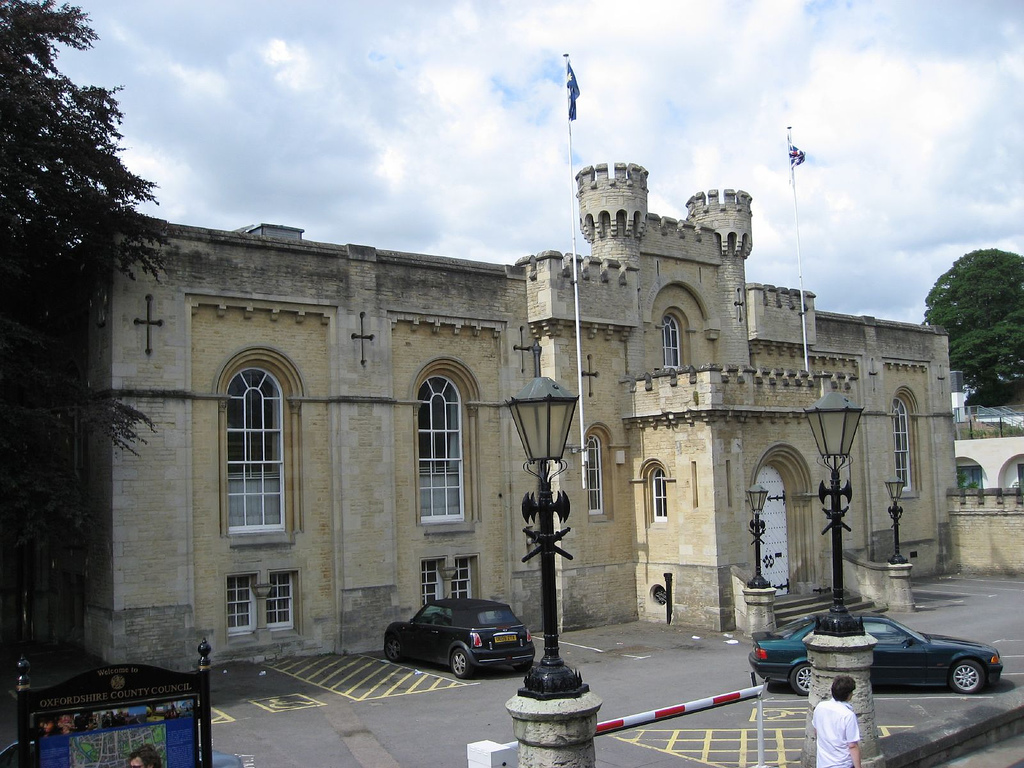

In [6]:
I=load_img(images[0])
I

In [7]:
from tqdm.notebook import tqdm
normalize = T.Compose([T.Resize(256),T.ToTensor(),
                       T.Normalize(mean=[0.485, 0.456, 0.406],
                                   std=[0.229, 0.224, 0.225])])

def format_img(img):
    """
    Given an Image, convert to ndarray and preprocess for VGG.
    :param Image img:
        Image object
    :returns ndarray:
        3d tensor formatted for VGG
    """
    # Get pixel values  
    d = normalize(img)  
    return d

def extract_features(sourcepath,model,device='cuda'):
  model=model.to(device)
  img_paths=glob.glob(sourcepath+'/*.jpg')
  print(img_paths)
  for img_path in tqdm(img_paths):
    img=load_img(img_path)
    if img is None:
      print(img_path)
      continue
    img= format_img(img).unsqueeze(0).to(device)
    features=model(img).squeeze().detach().cpu().numpy()
    features=features.reshape(features.shape[0],-1).T
    np_path=img_path[:-3]+'npy'
    with open(np_path,'wb') as f:
      np.save(f,features)

In [19]:
extract_features(sourcepath='../../dataset/oxford/data',model=vgg,device='cuda')

['../../dataset/oxford/data/oxford_001365.jpg', '../../dataset/oxford/data/oxford_001390.jpg', '../../dataset/oxford/data/oxford_001385.jpg', '../../dataset/oxford/data/oxford_001350.jpg', '../../dataset/oxford/data/oxford_001355.jpg', '../../dataset/oxford/data/oxford_001440.jpg', '../../dataset/oxford/data/oxford_001397.jpg', '../../dataset/oxford/data/oxford_001382.jpg', '../../dataset/oxford/data/oxford_001439.jpg', '../../dataset/oxford/data/oxford_001383.jpg', '../../dataset/oxford/data/oxford_001436.jpg', '../../dataset/oxford/data/oxford_001402.jpg', '../../dataset/oxford/data/oxford_001360.jpg', '../../dataset/oxford/data/oxford_001441.jpg', '../../dataset/oxford/data/oxford_001396.jpg', '../../dataset/oxford/data/oxford_001392.jpg', '../../dataset/oxford/data/oxford_001380.jpg', '../../dataset/oxford/data/oxford_001341.jpg', '../../dataset/oxford/data/oxford_001314.jpg', '../../dataset/oxford/data/oxford_001413.jpg', '../../dataset/oxford/data/oxford_001361.jpg', '../../datas

  0%|          | 0/5063 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
extract_features(sourcepath='../../dataset/paris/data',model=vgg,device='cuda')

['../../dataset/paris/data/paris_pompidou_000627.jpg', '../../dataset/paris/data/paris_pompidou_000631.jpg', '../../dataset/paris/data/paris_pompidou_000633.jpg', '../../dataset/paris/data/paris_pompidou_000629.jpg', '../../dataset/paris/data/paris_pompidou_000640.jpg', '../../dataset/paris/data/paris_pompidou_000638.jpg', '../../dataset/paris/data/paris_pompidou_000642.jpg', '../../dataset/paris/data/paris_pompidou_000636.jpg', '../../dataset/paris/data/paris_pompidou_000641.jpg', '../../dataset/paris/data/paris_pompidou_000639.jpg', '../../dataset/paris/data/paris_pompidou_000643.jpg', '../../dataset/paris/data/paris_pompidou_000644.jpg', '../../dataset/paris/data/paris_pompidou_000645.jpg', '../../dataset/paris/data/paris_pompidou_000646.jpg', '../../dataset/paris/data/paris_pompidou_000651.jpg', '../../dataset/paris/data/paris_pompidou_000648.jpg', '../../dataset/paris/data/paris_pompidou_000650.jpg', '../../dataset/paris/data/paris_pompidou_000658.jpg', '../../dataset/paris/data/p

  0%|          | 0/6412 [00:00<?, ?it/s]

../../dataset/paris/data/paris_pompidou_000640.jpg
../../dataset/paris/data/paris_sacrecoeur_000299.jpg
../../dataset/paris/data/paris_sacrecoeur_000330.jpg
../../dataset/paris/data/paris_sacrecoeur_000353.jpg
../../dataset/paris/data/paris_triomphe_000662.jpg
../../dataset/paris/data/paris_triomphe_000833.jpg
../../dataset/paris/data/paris_triomphe_000863.jpg
../../dataset/paris/data/paris_triomphe_000867.jpg
../../dataset/paris/data/paris_pantheon_000284.jpg
../../dataset/paris/data/paris_pantheon_000960.jpg
../../dataset/paris/data/paris_pantheon_000974.jpg
../../dataset/paris/data/paris_pompidou_000195.jpg
../../dataset/paris/data/paris_pompidou_000196.jpg
../../dataset/paris/data/paris_pompidou_000201.jpg
../../dataset/paris/data/paris_pompidou_000467.jpg
../../dataset/paris/data/paris_museedorsay_001059.jpg
../../dataset/paris/data/paris_notredame_000188.jpg
../../dataset/paris/data/paris_louvre_000136.jpg
../../dataset/paris/data/paris_louvre_000146.jpg
../../dataset/paris/data/

## Now for the queries

In [9]:
def query_images(groundtruth_dir, image_dir, dataset, cropped=True):
    """
    Extract features from the Oxford or Paris dataset.
    :param str groundtruth_dir:
        the directory of the groundtruth files (which includes the query files)
    :param str image_dir:
        the directory of dataset images
    :param str dataset:
        the name of the dataset, either 'oxford' or 'paris'
    :param bool cropped:
        flag to optionally disable cropping
    :yields Image img:
        the Image object
    :yields str query_name:
        the name of the query
    """
    for f in glob.iglob(os.path.join(groundtruth_dir, '*_query.txt')):
        query_name = os.path.splitext(os.path.basename(f))[0].replace('_query', '')
        img_name, x, y, w, h = open(f).read().strip().split(' ')

        if dataset == 'oxford':
            img_name = img_name.replace('oxc1_', '')
        img = Image.open(os.path.join(image_dir, '%s.jpg' % img_name))

        if cropped:
            x, y, w, h = map(float, (x, y, w, h))
            box = map(lambda d: int(round(d)), (x, y, x + w, y + h))
            img = img.crop(box)

        yield img, query_name

In [13]:
def extract_features_queries(dataset,model,device='cuda'):
  model=model.to(device)
  groundtruth_dir = '../../dataset/'+dataset+'/groundtruth/'
  images_dir = '../../dataset/'+dataset+'/data/'
  
  target_path= '../../dataset/'+dataset+'/queries/'
  if not os.path.exists(target_path):
     os.mkdir(target_path)
  
  for img, name in tqdm(query_images(groundtruth_dir, images_dir, dataset)):
    img= format_img(img).unsqueeze(0).to(device)
    features=model(img).squeeze().detach().cpu().numpy()
    features=features.reshape(features.shape[0],-1).T
    np_path=target_path+name+'.npy'
    with open(np_path,'wb') as f:
      np.save(f,features)

In [14]:
extract_features_queries('oxford',vgg,device='cuda')

0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [15]:
extract_features_queries('paris',vgg,device='cuda')

0it [00:00, ?it/s]

In [ ]:
! git add VGG16
! git config --global user.email "soheil.kolouri@gmail.com"
! git config --global user.name "skolouri"
! git commit -m "The translation experiment"
! git push 